In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
df=pd.read_excel('Chapter5_NPV_DataSet.xlsx')

In [3]:
df.describe()

,Lateral_length,Stage_length,Sand_to_water_ratio,Sand_per_ft,Water_per_ft,EUR_BCF,NPV_at_3.0_MMBTU_Gas Pricing
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,8911.663566,223.834920,1.268741,2066.112041,39.069433,9.795406,-0.634117
std,2995.195633,52.900698,0.338050,903.288312,15.740073,6.193401,3.631055
min,2439.500000,85.600003,0.119433,310.728368,8.118385,0.173786,-8.092757
25%,6433.225000,178.830607,1.108849,1416.164360,26.593500,5.212174,-3.107133
50%,8089.450000,204.708946,1.249180,2027.515360,40.575506,8.570267,-1.587870
75%,11582.100000,263.308520,1.437271,2777.796760,51.229328,12.465853,1.061966
max,16918.400000,386.754534,2.442476,4964.854720,75.340213,37.375668,13.828945


In [4]:
df.columns

Index(['Lateral_length', 'Stage_length', 'Sand_to_water_ratio', 'Sand_per_ft',
       'Water_per_ft', 'EUR_BCF', 'NPV_at_3.0_MMBTU_Gas Pricing'],
      dtype='object')

In [5]:
x=df.drop(['NPV_at_3.0_MMBTU_Gas Pricing'], axis=1)
y=df['NPV_at_3.0_MMBTU_Gas Pricing']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
seed= 1000
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [8]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [9]:
np.random.seed(seed)
agb=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=None,min_samples_split=4,
    min_samples_leaf=2), n_estimators=200, learning_rate=0.1,loss='linear')

In [10]:
agb.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=2,
                                                       min_samples_split=4,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
               

In [11]:
y_pred_train=agb.predict(X_train)
y_pred_test=agb.predict(X_test)

In [12]:
corr_train=np.corrcoef(y_train, y_pred_train) [0,1]

print('Training Data R^2=',round(corr_train**2,4),'R=', round(corr_train,4))

Training Data R^2= 0.9984 R= 0.9992


In [13]:
corr_test=np.corrcoef(y_test, y_pred_test) [0,1]

print('Testing Data R^2=',round(corr_test**2,4),'R=', round(corr_test,4))

Testing Data R^2= 0.8917 R= 0.9443


Text(0.5, 1.0, 'NPV Training Actual Vs. Prediction')

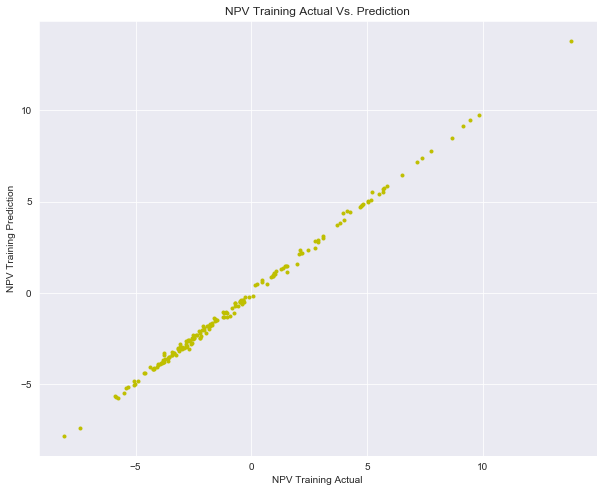

In [14]:
plt.figure(figsize=(10,8))
plt.plot(y_train, y_pred_train, 'y.')
plt.xlabel('NPV Training Actual')
plt.ylabel('NPV Training Prediction')
plt.title('NPV Training Actual Vs. Prediction')

Text(0.5, 1.0, 'NPV Testing Actual Vs. Prediction')

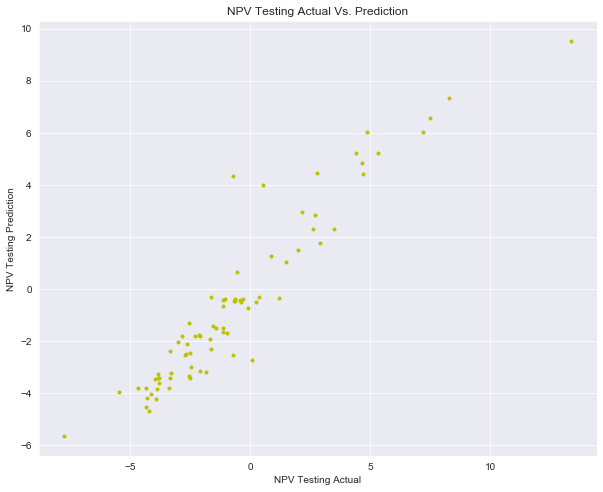

In [15]:
plt.figure(figsize=(10,8))
plt.plot(y_test, y_pred_test, 'y.')
plt.xlabel('NPV Testing Actual')
plt.ylabel('NPV Testing Prediction')
plt.title('NPV Testing Actual Vs. Prediction')

In [16]:
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred_test),5))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred_test),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),5))

MAE: 0.77298
MSE: 1.33434
RMSE: 1.15514


Text(0.5, 1.0, 'Feature Importance Ranking')

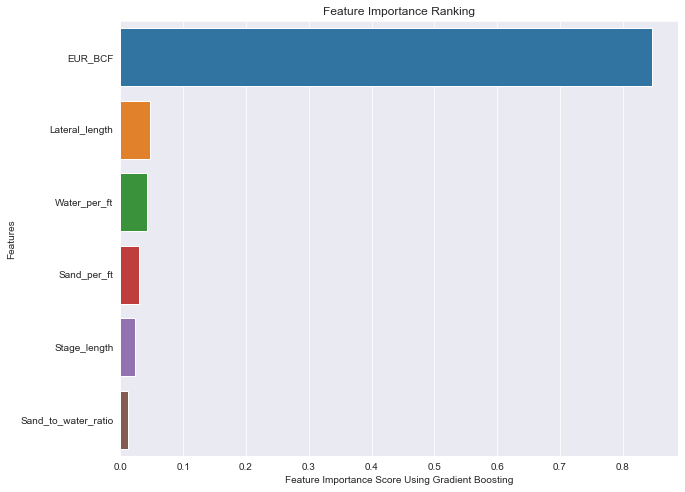

In [17]:
feature_names = df.columns[:-1]
plt.figure(figsize=(10,8))
feature_imp = pd.Series(agb.feature_importances_,index=feature_names).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score Using Gradient Boosting')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
np.random.seed(seed)
scores_R2 = cross_val_score(agb, x, y,cv=10,scoring='r2')

In [20]:
print(" R2_Cross-validation scores: {}". format( scores_R2))

 R2_Cross-validation scores: [0.92186019 0.88601973 0.75506971 0.94139885 0.92490025 0.88551602
 0.50663126 0.95476168 0.91861629 0.80053136]


In [21]:
print(" Average R2_Cross-validation scores: {}". format( scores_R2.mean()))

 Average R2_Cross-validation scores: 0.8495305328469369


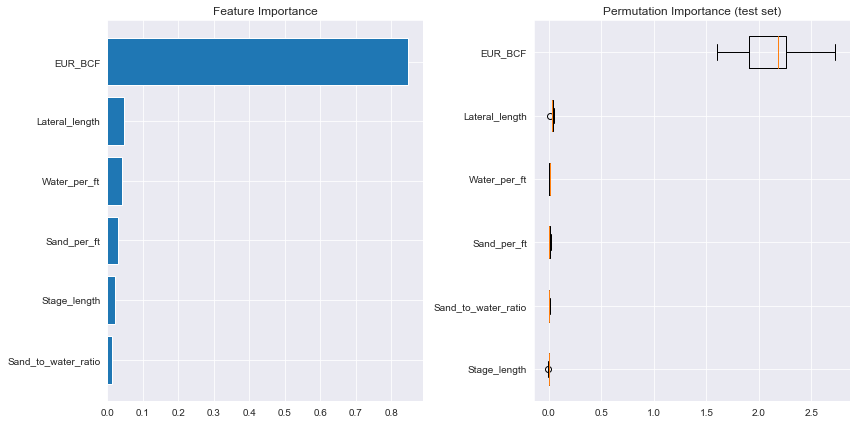

In [22]:
from sklearn.inspection import permutation_importance
feature_importance = agb.feature_importances_
sorted_features = np.argsort(feature_importance)
pos = np.arange(sorted_features.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_features], align='center')
plt.yticks(pos, np.array(df.columns)[sorted_features])
plt.title('Feature Importance')

result = permutation_importance(agb, X_test, y_test, n_repeats=10,random_state=seed)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(df.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()